In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
ogdata = pd.read_csv('/content/drive/Shareddrives/Cogs 109/Engineering_graduate_salary.csv')

In [ ]:
ogdata.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
data = ogdata[['ID','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','collegeGPA','Salary']]
gpa = data['collegeGPA']
gpastd = np.std(gpa)
gpamean = np.mean(gpa)
data = data.loc[data['collegeGPA'] >= gpamean - 3*gpastd]
data = data.reset_index(drop = True)
data.drop(['ID','Salary'],axis=1)

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,collegeGPA
0,-0.1590,0.3789,1.2396,0.14590,0.2889,73.82
1,1.1336,0.0459,1.2396,0.52620,-0.2859,65.00
2,0.5100,-0.1232,1.5428,-0.29020,-0.2875,61.94
3,-0.4463,0.2124,0.3174,0.27270,0.4805,80.40
4,-1.4992,-0.7473,-1.0697,0.06223,0.1864,64.30
...,...,...,...,...,...,...
2984,-1.1901,0.9688,-1.0697,1.35490,0.0284,70.00
2985,-0.1082,0.0328,-0.4891,-0.29020,0.5024,75.20
2986,-0.8810,0.1888,-0.3440,0.06230,0.6603,73.19
2987,1.4374,1.2808,-0.4891,-1.46537,0.5419,74.81


(array([ 18.,  94., 370., 645., 809., 629., 293.,  98.,  25.,   8.]),
 array([49.07 , 54.156, 59.242, 64.328, 69.414, 74.5  , 79.586, 84.672,
        89.758, 94.844, 99.93 ]),
 <BarContainer object of 10 artists>)

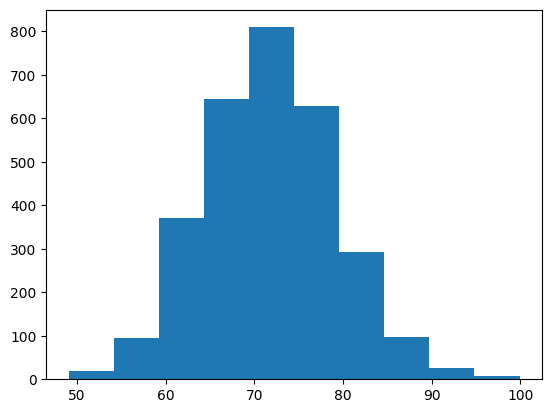

In [ ]:
gpa = data['collegeGPA']
plt.hist(gpa)

In [ ]:
Formula5 = 'collegeGPA~ 1+' + '+'.join(data.columns[1:-2].values)
mdl5 = ols(formula = Formula5, data = data).fit()

In [ ]:
mdl5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             collegeGPA   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     12.51
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           4.88e-12
Time:                        03:28:14   Log-Likelihood:                -10170.
No. Observations:                2989   AIC:                         2.035e+04
Df Residuals:                    2983   BIC:                         2.039e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                71.5599      0.140    509.852      0.000      71.285      71.835
conscientiousness         0.3655      0.159      2.295      0.022       0.053       0.678
agreeableness             0.6838      0.190      3.602      0.000       0.312       1.056
extraversion             -0.9440      0.163     -5.800      0.000      -1.263      -0.625
nueroticism              -0.3860      0.140     -2.754      0.006      -0.661      -0.111
openess_to_experience    -0.0384      0.171     -0.225      0.822      -0.374       0.297
==============================================================================
Omnibus:                       18.269   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.519
Skew:                           0.180   Prob(JB):                     9.52e-05
Kurtosis:                       3.137   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mdl5.pvalues

Intercept                0.000000e+00
conscientiousness        2.182151e-02
agreeableness            3.211928e-04
extraversion             7.307937e-09
nueroticism              5.928984e-03
openess_to_experience    8.223719e-01
dtype: float64

In [ ]:
mdl4 = ols(formula = 'collegeGPA ~ 1 + conscientiousness + agreeableness + extraversion + nueroticism', data = data).fit()

In [ ]:
mdl4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             collegeGPA   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.62
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.17e-12
Time:                        03:28:14   Log-Likelihood:                -10170.
No. Observations:                2989   AIC:                         2.035e+04
Df Residuals:                    2984   BIC:                         2.038e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            71.5669      0.137    522.966      0.000      71.299      71.835
conscientiousness     0.3603      0.158      2.287      0.022       0.051       0.669
agreeableness         0.6654      0.171      3.885      0.000       0.330       1.001
extraversion         -0.9518      0.159     -5.989      0.000      -1.263      -0.640
nueroticism          -0.3895      0.139     -2.796      0.005      -0.663      -0.116
==============================================================================
Omnibus:                       18.242   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.486
Skew:                           0.180   Prob(JB):                     9.68e-05
Kurtosis:                       3.136   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mdl4.pvalues

Intercept            0.000000e+00
conscientiousness    2.228307e-02
agreeableness        1.045489e-04
extraversion         2.366151e-09
nueroticism          5.207791e-03
dtype: float64

In [ ]:
mdl3 = ols(formula = 'collegeGPA ~ 1 + agreeableness + extraversion + nueroticism', data = data).fit()

In [ ]:
mdl3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             collegeGPA   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.06
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.04e-12
Time:                        03:28:14   Log-Likelihood:                -10172.
No. Observations:                2989   AIC:                         2.035e+04
Df Residuals:                    2985   BIC:                         2.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        71.5236      0.136    527.358      0.000      71.258      71.789
agreeableness     0.8042      0.160      5.018      0.000       0.490       1.118
extraversion     -0.8817      0.156     -5.650      0.000      -1.188      -0.576
nueroticism      -0.4728      0.135     -3.514      0.000      -0.737      -0.209
==============================================================================
Omnibus:                       17.251   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.497
Skew:                           0.173   Prob(JB):                     0.000159
Kurtosis:                       3.143   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mdl3.pvalues

Intercept        0.000000e+00
agreeableness    5.520162e-07
extraversion     1.756245e-08
nueroticism      4.476819e-04
dtype: float64

In [ ]:
#To cross validate our different models, we will get the MSE of each stage of our model using K-Fold with k =5
k = 5
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data):

    testdf = data.iloc[testInd]
    traindf = data.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    gpa = traindf['collegeGPA']
    con = traindf['conscientiousness']
    ag = traindf['agreeableness']
    ex = traindf['extraversion']
    neu = traindf['nueroticism']
    open = traindf['openess_to_experience']
    m5 = ols(formula = 'gpa ~ 1 + con + ag + ex + neu + open',data = traindf).fit();
    m5params = m5.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m5params[0] + m5params[1]*traindf['conscientiousness'][ind] + m5params[2]*traindf['agreeableness'][ind]
                       + m5params[3]*traindf['extraversion'][ind] + m5params[4]*traindf['nueroticism'][ind] + m5params[5]*traindf['openess_to_experience'][ind])
    traintrue = traindf['collegeGPA'].tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m5params[0] + m5params[1]*testdf['conscientiousness'][ind] + m5params[2]*testdf['agreeableness'][ind]
                       + m5params[3]*testdf['extraversion'][ind] + m5params[4]*testdf['nueroticism'][ind] + m5params[5]*testdf['openess_to_experience'][ind])
    testtrue = testdf['collegeGPA'].tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse5 = sum(trainerr)/ntrain
testmse5 = sum(testerr)/ntest
print(trainmse5,testmse5)

53.806062201843204 48.93968536689063


In [ ]:
#Repeat for mdl4 (openess removed)
k = 5
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data):

    testdf = data.iloc[testInd]
    traindf = data.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    gpa = traindf['collegeGPA']
    con = traindf['conscientiousness']
    ag = traindf['agreeableness']
    ex = traindf['extraversion']
    neu = traindf['nueroticism']
    m4 = ols(formula = 'gpa ~ 1 + con + ag + ex + neu',data = traindf).fit();
    m4params = m4.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m4params[0] + m4params[1]*traindf['conscientiousness'][ind] + m4params[2]*traindf['agreeableness'][ind]
                       + m4params[3]*traindf['extraversion'][ind] + m4params[4]*traindf['nueroticism'][ind])
    traintrue = traindf['collegeGPA'].tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m4params[0] + m4params[1]*testdf['conscientiousness'][ind] + m4params[2]*testdf['agreeableness'][ind]
                       + m4params[3]*testdf['extraversion'][ind] + m4params[4]*testdf['nueroticism'][ind])
    testtrue = testdf['collegeGPA'].tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse4 = sum(trainerr)/ntrain
testmse4 = sum(testerr)/ntest
print(trainmse4,testmse4)

53.826139030620105 48.799136882524735


In [ ]:
#Repeat for mdl3 (conscientiousness removed)
k = 5
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data):

    testdf = data.iloc[testInd]
    traindf = data.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    gpa = traindf['collegeGPA']
    ag = traindf['agreeableness']
    ex = traindf['extraversion']
    neu = traindf['nueroticism']
    m3 = ols(formula = 'gpa ~ 1 + ag + ex + neu',data = traindf).fit();
    m3params = m3.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m3params[0] + + m3params[1]*traindf['agreeableness'][ind]
                       + m3params[2]*traindf['extraversion'][ind] + m3params[3]*traindf['nueroticism'][ind])
    traintrue = traindf['collegeGPA'].tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m3params[0] +  + m3params[1]*testdf['agreeableness'][ind]
                       + m3params[2]*testdf['extraversion'][ind] + m3params[3]*testdf['nueroticism'][ind])
    testtrue = testdf['collegeGPA'].tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse3 = sum(trainerr)/ntrain
testmse3 = sum(testerr)/ntest
print(trainmse3,testmse3)

53.9157013271828 48.90307219128618


Text(0, 0.5, '1 = Training Set, 2 = Testing Set')

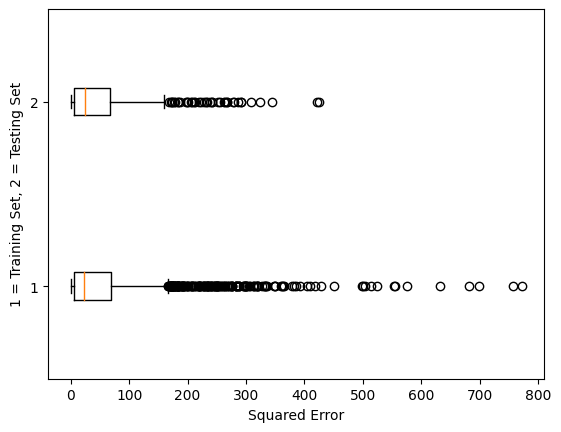

In [ ]:
plt.boxplot([trainerr,testerr], vert = False)
plt.xlabel('Squared Error')
plt.ylabel('1 = Training Set, 2 = Testing Set')

In [ ]:
MSEdf = pd.DataFrame({"TrainingMSE":[trainmse5, trainmse4, trainmse3], "TestMSE":[testmse5,testmse4,testmse3]})
MSEdf.index = ['mdl5', 'mdl4', 'mdl3']
MSEdf

,TrainingMSE,TestMSE
mdl5,53.806062,48.939685
mdl4,53.826139,48.799137
mdl3,53.915701,48.903072


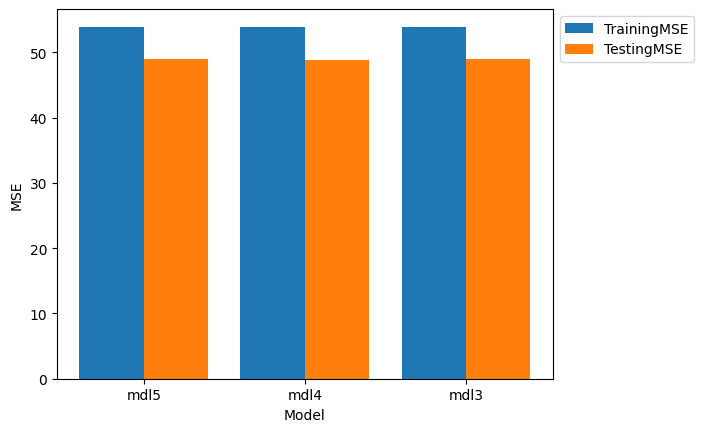

In [ ]:
X = ['mdl5','mdl4', 'mdl3']
Ytrain = [53.806062,53.826139,53.915701]
Ztest = [48.939685,48.799137,48.903072]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ytrain, 0.4, label = 'TrainingMSE')
plt.bar(X_axis + 0.2, Ztest, 0.4, label = 'TestingMSE')

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

In [ ]:
mdln = len(data.index)
mdlparams = mdl3.params
mdlpred = []
for ind in data.index:
  mdlpred.append(mdlparams[0] + mdlparams[1]*data['agreeableness'][ind] +
                   mdlparams[2]*data['extraversion'][ind] + mdlparams[3]*data['nueroticism'][ind])

mdlerror = []
for i in range(mdln):
  mdlerror.append((data['collegeGPA'][i] - mdlpred[i])**2)

mdlMSE = sum(mdlerror)/mdln
mdlobservations = pd.DataFrame({'MSE':[mdlMSE], 'ErrorVariance': [np.var(mdlerror)], 'MinError': [np.min(mdlerror)], 'MaxError': [np.max(mdlerror)]})
mdlobservations

,MSE,ErrorVariance,MinError,MaxError
0,52.908896,5998.713477,0.000005,770.947243


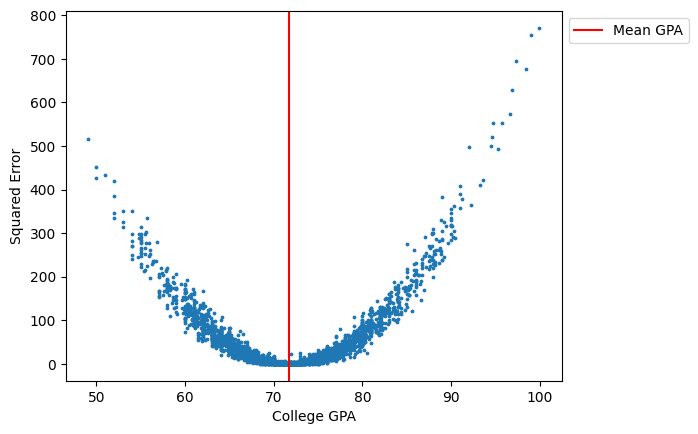

In [ ]:
data['Sq.Error'] = mdlerror
data['Prediction'] = mdlpred
x= data['collegeGPA']
y = data['Sq.Error']
plt.scatter(x,y, s= 3)
plt.xlabel("College GPA")
plt.ylabel("Squared Error")
plt.axvline(x = np.mean(data['collegeGPA']), color = 'r', label = 'Mean GPA')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

In [ ]:
data[['collegeGPA', 'Prediction', 'Sq.Error']]

,collegeGPA,Prediction,Sq.Error
0,73.82,70.666334,9.945611
1,65.00,70.218715,27.234986
2,61.94,70.201372,68.250262
3,80.40,71.285595,83.072377
4,64.30,71.836298,56.795794
...,...,...,...
2984,70.00,72.605296,6.787565
2985,75.20,72.118394,9.496295
2986,73.19,71.949259,1.539439
2987,74.81,73.677710,1.282080


(array([2.548e+03, 4.170e+02, 1.800e+01, 5.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <BarContainer object of 10 artists>)

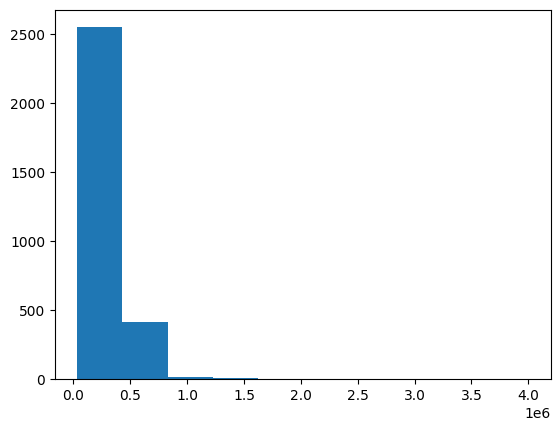

In [ ]:
data2 = ogdata[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']]
salary = data2['Salary']
plt.hist(salary)


(array([  8.,  20.,  36., 315., 404., 516., 774., 631., 218.,  50.]),
 array([15.0950673 , 15.56824769, 16.04142808, 16.51460847, 16.98778886,
        17.46096925, 17.93414964, 18.40733002, 18.88051041, 19.3536908 ,
        19.82687119]),
 <BarContainer object of 10 artists>)

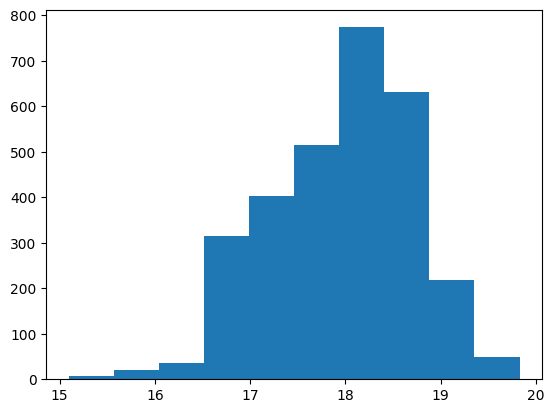

In [ ]:
salstd = np.std(salary)
salmed = np.median(salary)
data2 = data2.loc[data2['Salary'] <= salmed + 3*salstd]
data2 = data2.reset_index(drop = True)
plt.hist(np.log2(data2['Salary']))

In [ ]:
traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
sig_level = 0.01
y = data['collegeGPA']

while len(traits) > 1:
  x = data[traits]
  model = sm.OLS(y, sm.add_constant(x)).fit()
  pvals = model.pvalues[1:]
  if pvals.max() >= sig_level:
    traits.remove(pvals.idxmax())
  else:
    break

mdl_sal1 = sm.OLS(y, sm.add_constant(data[traits])).fit()
mdl_sal1.summary()
mdl_sal1.pvalues

const            0.000000e+00
agreeableness    5.520162e-07
extraversion     1.756245e-08
nueroticism      4.476819e-04
dtype: float64

In [ ]:
mdl_sal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             collegeGPA   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.06
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.04e-12
Time:                        03:28:23   Log-Likelihood:                -10172.
No. Observations:                2989   AIC:                         2.035e+04
Df Residuals:                    2985   BIC:                         2.038e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.5236      0.136    527.358      0.000      71.258      71.789
agreeableness     0.8042      0.160      5.018      0.000       0.490       1.118
extraversion     -0.8817      0.156     -5.650      0.000      -1.188      -0.576
nueroticism      -0.4728      0.135     -3.514      0.000      -0.737      -0.209
==============================================================================
Omnibus:                       17.251   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.497
Skew:                           0.173   Prob(JB):                     0.000159
Kurtosis:                       3.143   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
sig_level = 0.01
y =  np.log2(data2['Salary'])

while len(traits) > 1:
  x = data2[traits]
  model = sm.OLS(y, sm.add_constant(x)).fit()
  pvals = model.pvalues[1:]
  if pvals.max() >= sig_level:
    traits.remove(pvals.idxmax())
  else:
    break

mdl_sal2 = sm.OLS(y, sm.add_constant(data2[traits])).fit()
mdl_sal2.summary()
mdl_sal2.pvalues

const                0.000000e+00
conscientiousness    3.477674e-08
agreeableness        2.338171e-10
nueroticism          1.609837e-07
dtype: float64

In [ ]:
mdl_sal2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.12e-15
Time:                        03:28:23   Log-Likelihood:                -3321.3
No. Observations:                2972   AIC:                             6651.
Df Residuals:                    2968   BIC:                             6675.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.9523      0.014   1288.459      0.000      17.925      17.980
conscientiousness    -0.0874      0.016     -5.530      0.000      -0.118      -0.056
agreeableness         0.1041      0.016      6.359      0.000       0.072       0.136
nueroticism          -0.0745      0.014     -5.252      0.000      -0.102      -0.047
==============================================================================
Omnibus:                      106.893   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.926
Skew:                          -0.486   Prob(JB):                     2.47e-26
Kurtosis:                       3.082   Cond. No.                         1.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#First remove extraversion then openess

In [ ]:
#To cross validate our different models, we will get the MSE of both versions of our model using K-Fold with k =5
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data2):

    testdf = data2.iloc[testInd]
    traindf = data2.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    sal = np.log2(traindf['Salary'])
    ag = traindf['agreeableness']
    ex = traindf['extraversion']
    neu = traindf['nueroticism']
    con = traindf['conscientiousness']
    open = traindf['openess_to_experience']
    m1 = ols(formula = 'sal ~ 1 + ag + ex + neu +con + open',data = traindf).fit();
    m1params = m1.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m1params[0] + m1params[1]*traindf['agreeableness'][ind] + m1params[2]*traindf['extraversion'][ind]
                       + m1params[3]*traindf['nueroticism'][ind] + m1params[4]*traindf['conscientiousness'][ind] + m1params[5]*traindf['openess_to_experience'][ind])
    traintrue = sal.tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m1params[0] + m1params[4]*testdf['conscientiousness'][ind]+ m1params[1]*testdf['agreeableness'][ind]
                       + m1params[2]*testdf['extraversion'][ind] + m1params[3]*testdf['nueroticism'][ind] + m1params[5]*testdf['openess_to_experience'][ind])
    testtrue = np.log2(testdf['Salary']).tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse1 = sum(trainerr)/ntrain
testmse1 = sum(testerr)/ntest
print(trainmse1,testmse1)

0.5496998717217192 0.5355833533141179


In [ ]:
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data2):

    testdf = data2.iloc[testInd]
    traindf = data2.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    sal = np.log2(traindf['Salary'])
    ag = traindf['agreeableness']
    ex = traindf['extraversion']
    neu = traindf['nueroticism']
    con = traindf['conscientiousness']
    m2 = ols(formula = 'sal ~ 1 + ag + ex + neu +con',data = traindf).fit();
    m2params = m2.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m2params[0] + m2params[1]*traindf['agreeableness'][ind] + m2params[2]*traindf['extraversion'][ind]
                       + m2params[3]*traindf['nueroticism'][ind] + m2params[4]*traindf['conscientiousness'][ind])
    traintrue = sal.tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m2params[0] + m2params[4]*testdf['conscientiousness'][ind]+ m2params[1]*testdf['agreeableness'][ind]
                       + m2params[2]*testdf['extraversion'][ind] + m2params[3]*testdf['nueroticism'][ind])
    testtrue = np.log2(testdf['Salary']).tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse2 = sum(trainerr)/ntrain
testmse2 = sum(testerr)/ntest
print(trainmse2,testmse2)

0.5499536516336355 0.5349492262660163


In [ ]:
#To cross validate our different models, we will get the MSE of both versions of our model using K-Fold with k =5
k = 5
kf = KFold(n_splits = k, random_state = 109, shuffle = True)

for trlInd,testInd in kf.split(data2):

    testdf = data2.iloc[testInd]
    traindf = data2.iloc[trlInd]
    ntrain = len(traindf.index)
    ntest = len(testdf.index)


    sal = np.log2(traindf['Salary'])
    con = traindf['conscientiousness']
    ag = traindf['agreeableness']
    neu = traindf['nueroticism']
    m3 = ols(formula = 'sal ~ 1 + con + ag  + neu',data = traindf).fit();
    m3params = m3.params;

    trainpred = []
    for ind in traindf.index:
      trainpred.append(m3params[0] + m3params[1]*traindf['conscientiousness'][ind] + m3params[2]*traindf['agreeableness'][ind]
                       + m3params[3]*traindf['nueroticism'][ind])
    traintrue = np.log2(traindf['Salary']).tolist()

    testpred = []
    for ind in testdf.index:
      testpred.append(m3params[0] + m3params[1]*testdf['conscientiousness'][ind] + m3params[2]*testdf['agreeableness'][ind]
                       + m3params[3]*testdf['nueroticism'][ind])
    testtrue = np.log2(testdf['Salary']).tolist()

trainerr = []
for i in range(ntrain):
  trainerr.append((traintrue[i] - trainpred[i])**2)

testerr = []
for i in range(ntest):
  testerr.append((testtrue[i] - testpred[i])**2)

trainmse3 = sum(trainerr)/ntrain
testmse3 = sum(testerr)/ntest
print(trainmse3,testmse3)

0.5502035441455627 0.5357299917696191


Text(0, 0.5, '1 = Training Set, 2 = Testing Set')

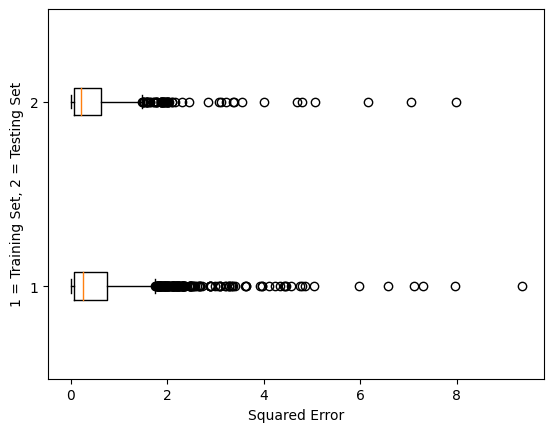

In [ ]:
plt.boxplot([trainerr,testerr], vert = False)
plt.xlabel('Squared Error')
plt.ylabel('1 = Training Set, 2 = Testing Set')

In [ ]:
MSEdf2 = pd.DataFrame({"TrainingMSE":[trainmse1, trainmse2, trainmse3], "TestMSE":[testmse1,testmse2,testmse3]})
MSEdf2.index = ['mdl1', 'mdl2', 'mdl3']
MSEdf2

,TrainingMSE,TestMSE
mdl1,0.549700,0.535583
mdl2,0.549954,0.534949
mdl3,0.550204,0.535730


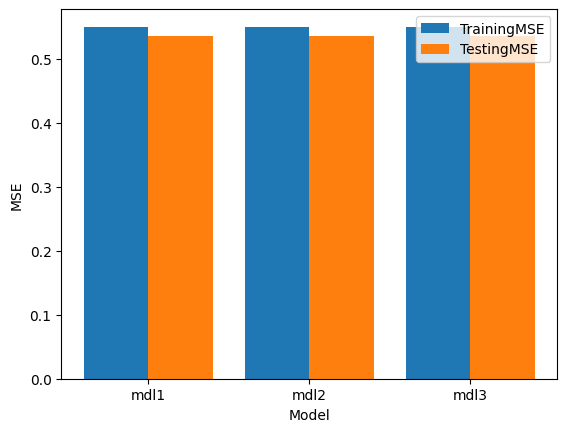

In [ ]:
X = ['mdl1','mdl2', 'mdl3']
Ytrain = [0.549700,0.549954, 0.550204]
Ztest = [0.535583,0.534949,0.5357299917696191]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ytrain, 0.4, label = 'TrainingMSE')
plt.bar(X_axis + 0.2, Ztest, 0.4, label = 'TestingMSE')

plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("MSE")
plt.legend()
plt.show()

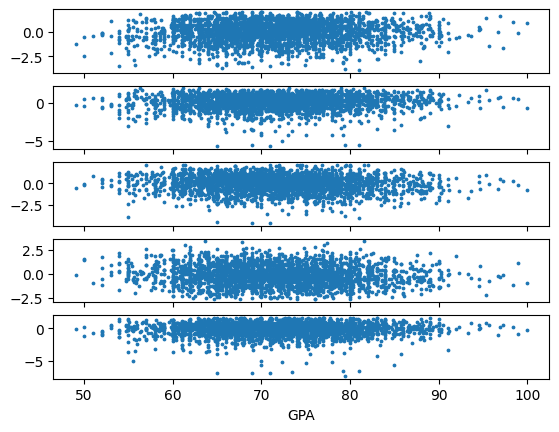

In [ ]:
fig,ax = plt.subplots(nrows = 5,sharex=True)
#'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','collegeGPA','Salary'
plt.xlabel('GPA')
ax[0].scatter(data['collegeGPA'],data['conscientiousness'],s = 3)
ax[1].scatter(data['collegeGPA'],data['agreeableness'],s = 3)
ax[2].scatter(data['collegeGPA'],data['extraversion'],s = 3)
ax[3].scatter(data['collegeGPA'],data['nueroticism'],s = 3)
ax[4].scatter(data['collegeGPA'],data['openess_to_experience'],s = 3)

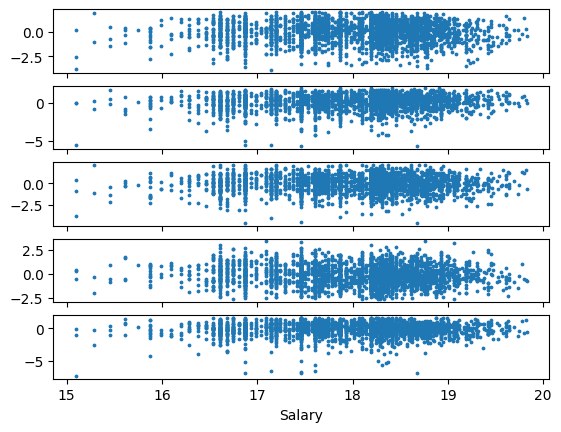

In [ ]:
fig,ax = plt.subplots(nrows = 5,sharex=True)
#'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','collegeGPA','Salary'
plt.xlabel('Salary')
ax[0].scatter(np.log2(data2['Salary']),data2['conscientiousness'],s = 3)
ax[1].scatter(np.log2(data2['Salary']),data2['agreeableness'],s = 3)
ax[2].scatter(np.log2(data2['Salary']),data2['extraversion'],s = 3)
ax[3].scatter(np.log2(data2['Salary']),data2['nueroticism'],s = 3)
ax[4].scatter(np.log2(data2['Salary']),data2['openess_to_experience'],s = 3)

In [ ]:
#Calculating MSE for salary prediction
mdln = len(data2.index)
mdlparams = mdl_sal2.params
mdlpred = []
for ind in data2.index:
  mdlpred.append(mdlparams[0] + mdlparams[1]*data2['conscientiousness'][ind] + mdlparams[2]*data2['agreeableness'][ind]
                       + mdlparams[3]*data2['nueroticism'][ind])

mdlerror = []
for i in range(mdln):
  mdlerror.append((np.log2(data2['Salary'])[i] - mdlpred[i])**2)

mdlMSE = sum(mdlerror)/mdln
mdlobservations = pd.DataFrame({'MSE':[mdlMSE], 'ErrorVariance': [np.var(mdlerror)], 'MinError': [np.min(mdlerror)], 'MaxError': [np.max(mdlerror)]})
mdlobservations

,MSE,ErrorVariance,MinError,MaxError
0,0.547274,0.623439,4.248454e-07,9.33441


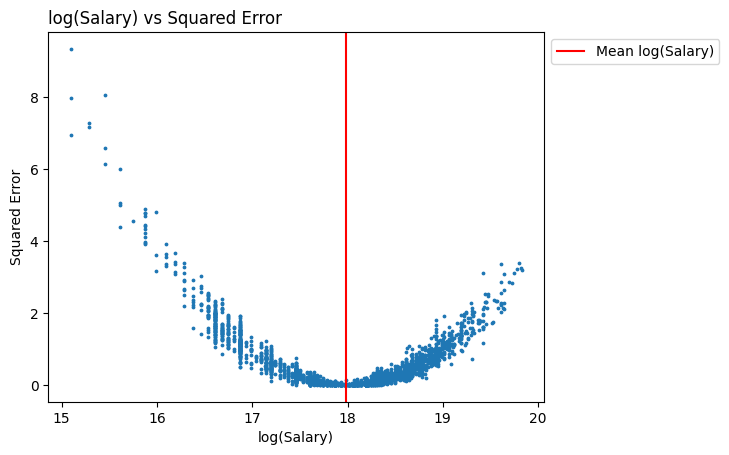

In [ ]:
data2['Sq.Error'] = mdlerror
data2['Prediction'] = mdlpred
data2['log(Salary)'] = np.log2(data2['Salary'])
x= np.log2(data2['Salary'])
y = data2['Sq.Error']
plt.scatter(x,y, s= 3)
plt.xlabel("log(Salary)")
plt.ylabel("Squared Error")
plt.axvline(x = np.mean(x), color = 'r', label = 'Mean log(Salary)')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.title('log(Salary) vs Squared Error', loc = 'left')
plt.show()

In [ ]:
data2[['log(Salary)','Prediction', 'Sq.Error']]

,log(Salary),Prediction,Sq.Error
0,18.763446,17.994734,0.590918
1,16.747144,17.818804,1.148455
2,17.960138,17.916514,0.001903
3,18.680030,17.993058,0.471931
4,17.609640,18.000840,0.153037
...,...,...,...
2967,16.872675,18.056143,1.400596
2968,16.872675,17.986764,1.241194
2969,18.554499,18.044257,0.260347
2970,19.015633,18.069181,0.895770
